# CW2: The Impact of Weather on Seoul Bike Sharing Demand

By Natamon Tosawat 
730102604


## Introduction
This report presents an in-depth analysis and development of a dashboard that visualizes the impact of weather conditions, seasons, holidays, and operational days on the demand for Seoul's bike-sharing services. Designed to support operations managers in urban mobility planning, the dashboard identifies key patterns influencing bike rentals throughout the year. By integrating advanced analytical methods, data visualization principles, and relevant datasets, this work transforms raw data into a strategic decision-making tool, enabling optimized resource allocation and service continuity in response to fluctuating demand patterns.


## Table of Links
### Table
| Description | Link |
| -- | -- |
| Reflective blog | https://github.com/natamontos/Seoul-Bike-Sharing-Demand |
| Chosen Datasets | https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand  |


## Table of Contents
1. Executive Summary
2. Project Context
3. Aims, Objective & Audience
4. Impact of Weather on Seoul Bike Sharing Demand – Dashboard (Code)
5. Articulation of Decision Making Process
6. Review of Analytics Methods Chosen
7. Review of Available Tools
8. Review of Chosen Datasets 
9. Visualisation of Data with Accompanying Code
10. Reflective Evaluation
11. Conclusion
12. References
13. Appendices

## 1. Executive Summary

The Seoul Bike Sharing Demand Dashboard was developed to analyze and visualize factors influencing bike rental demand, including weather conditions, seasonal trends, holidays, and time variations. By leveraging Python, Dash, Plotly, and Bootstrap, the dashboard provides an interactive tool for operations managers to optimize resource allocation and improve service efficiency.

The analysis reveals clear patterns in bike demand across different periods. Seasonal trends indicate that demand peaks during summer and autumn, particularly in the evening hours between 15:00 and 21:00. This highlights the need for targeted bike availability during these seasons and timeframes to accommodate heightened usage.

A comparison between holidays and non-holidays further emphasizes behavioral differences. On non-holidays, bike demand is generally higher, with distinct peaks observed during the morning at around 8:00 and in the evening after work hours. This suggests that bike usage on non-holidays aligns with daily commuting activities, particularly for work-related travel. In contrast, holidays exhibit a more consistent demand pattern throughout the day, with demand peaking between 10:00 and 15:00. Notably, demand declines after 21:00 for both holidays and non-holidays, though non-holiday evenings still maintain slightly higher usage. These insights suggest the importance of prioritizing bike availability during peak commuting hours on workdays, while ensuring sufficient resources for steady mid-day usage on holidays.

Weather factors significantly impact bike demand. Rising temperatures and increased solar radiation correspond to higher demand for bike sharing, as favorable weather encourages outdoor activities. On the other hand, excessive wind speed and humidity, which are often associated with rain or snowfall, negatively influence bike rentals and cause a noticeable decline in usage.

The demand forecasting analysis indicates a projected increase in bike usage in the coming year, particularly during May to July, which are expected to see the highest demand levels. Proactive measures should be taken to ensure sufficient resources during these peak months. Conversely, demand drops significantly in winter, especially between December and early February. This seasonal lull presents an opportunity for resource reallocation, such as forming partnerships with food delivery platforms or other initiatives to generate revenue and minimize opportunity costs during periods of reduced demand.

The dashboard provides actionable insights into bike-sharing trends, enabling stakeholders to make data-driven decisions, plan efficiently for peak usage, and adapt strategies to seasonal fluctuations.


## 2. Project Context

Seoul, ranked the 8th largest metropolitan area in Asia (GlobalGeografia, 2024), faces persistent challenges such as traffic congestion, air pollution, and rising fuel costs. To address these issues, the Seoul Public Bike, Ttareungyi system was introduced as an unmanned bike-sharing service, offering convenient access anytime and anywhere to promote sustainable transportation and enhance citizens' quality of life (SEOUL METROPOLITAN GOVERNMENT, n.d.).

This project analyzes the demand for bike rentals in Seoul over one year, from December 1, 2017, to November 30, 2018. The dataset includes hourly rental counts alongside weather-related factors such as temperature, humidity, wind speed, and solar radiation, as well as contextual variables like seasons, holidays, and functional days. By examining these factors, the project identifies patterns and trends influencing bike demand.

Furthermore, demand forecasting visualizations in next year are provided to predict future bike usage under similar conditions. These insights would assist operations managers in optimizing resource allocation, preparing sufficient bike supplies during peak periods, and ensuring service reliability. The visualizations offer a clear, data-driven perspective that enables effective planning to meet fluctuating demand, improving both user satisfaction and operational efficiency.

## 3. Aims, Objective & Audience

### Aims

The project aims to develop a comprehensive and intuitive dashboard that visualizes the relationship between weather conditions, seasonal variations, holidays, and functional days on the hourly demand for Seoul’s bike-sharing service. By leveraging data analytics and forecasting techniques, this dashboard will provide actionable insights to optimize bike supply, ensuring efficient resource allocation and enhanced service reliability.

### Objectives

1. Visualize the Impact of Weather Conditions on Bike Demand: 
Present the relationships between temperature, humidity, wind speed, visibility, and bike rental counts, identifying key weather factors influencing demand.
2. Analyze Seasonal and Temporal Trends: 
Illustrate how bike rental demand fluctuates across seasons, holidays, and functional hours to uncover significant usage patterns.
3. Provide Demand Forecasting: 
Develop visualizations that forecast future bike demand based on historical patterns and weather conditions, enabling proactive planning.
4. Ensure Accessibility and Clarity: 
Design the dashboard to be user-friendly, allowing managers and executives to extract insights quickly without advanced analytical training.

### Audience

The primary audience for this dashboard is operations managers and supply chain executives overseeing the Seoul Public Bike system. This tool will assist them in understanding the key factors driving bike rental demand, identifying seasonal and weather-driven trends, and predicting future demand. The insights generated will empower decision-makers to plan resources effectively, anticipate high-demand periods, and ensure sufficient bike availability, ultimately improving user satisfaction and operational efficiency.

## 4. Impact of Weather on Seoul Bike Sharing Demand – Dashboard (Code)

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from dash import Dash, html, dcc
import dash_bootstrap_components as dbc
import numpy as np
from prophet import Prophet

# Load dataset
dataset = pd.read_csv('SeoulBikeDataset.csv')

# Filter rows where Functioning Day is "Yes"
df = dataset[dataset['Functioning Day'] == 'Yes']

# Visualization 1: Hourly Demand by Months ---------------------------------------------------------

# Data preprocessing
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Date'])  # Drop rows with invalid dates
df['Month'] = df['Date'].dt.strftime('%b') 

# Define the month order and map seasons
month_order = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
seasons_positions = {'Winter': 'Jan', 'Spring': 'Apr', 'Summer': 'Jul', 'Autumn': 'Oct'}
df['Day'] = df['Date'].dt.day  # Extract day

# Aggregate data
demand_by_date_month = df.groupby(['Day', 'Month', 'Hour'])['Rented Bike Count'].mean().reset_index()

# Determine fixed color scale range
color_min = demand_by_date_month['Rented Bike Count'].min()
color_max = demand_by_date_month['Rented Bike Count'].max()
ibm_color_scale = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']

# Creating Heatmap
fig1 = px.density_heatmap(
    demand_by_date_month,
    x='Month',
    y='Day',
    z='Rented Bike Count',
    animation_frame='Hour',  # Hour-wise animation
    color_continuous_scale=ibm_color_scale,  # IBM Design Library palette
    range_color=[color_min, color_max],  # Fix color scale range
    title='<b>Hourly Bike Demand Across Months and Days',
    labels={'Rented Bike Count': 'Bike Demand'}
)

# Update layout for X-axis order and layout
fig1.update_layout(
    height=400,  
    width=650,  
    margin=dict(l=10, r=10, t=50, b=10),  # Reduce margins
    title_x=0.5, 
    xaxis_title='<b>Month</b>',
    yaxis_title='<b>Day of the Month</b>',
    xaxis=dict(categoryorder='array', categoryarray=month_order),
    yaxis=dict(
        tickvals=[1, 5, 10, 15, 20, 25, 31],  # Specify tick positions
        ticktext=['1', '5', '10', '15', '20', '25', '31'],  # Corresponding text for ticks
        range=[0, 31]  # Ensure Y-axis starts from 0 and ends at 31
    ),
    plot_bgcolor='white',
    coloraxis_colorbar=dict(
        title="<b>Bike Demand",
        tickvals=[0, 1000, 2000, 3000, color_max], 
        ticktext=["0", "1000", "2000", "3000", f"{color_max:.0f}"]
    ),
    shapes=[
        # Add vertical white lines to separate seasons
        dict(type='line', x0='Feb', x1='Feb', y0=0, y1=31, line=dict(color='white', width=2)),
        dict(type='line', x0='May', x1='May', y0=0, y1=31, line=dict(color='white', width=2)),
        dict(type='line', x0='Aug', x1='Aug', y0=0, y1=31, line=dict(color='white', width=2)),
        dict(type='line', x0='Nov', x1='Nov', y0=0, y1=31, line=dict(color='white', width=2)),
    ],
    annotations=[
        # Add season labels above the lines
        dict(x='Jan', y=30.25, text='Winter', showarrow=False, font=dict(size=12, color='white')),
        dict(x='Apr', y=30.25, text='Spring', showarrow=False, font=dict(size=12, color='white')),
        dict(x='Jul', y=30.25, text='Summer', showarrow=False, font=dict(size=12, color='white')),
        dict(x='Oct', y=30.25, text='Autumn', showarrow=False, font=dict(size=12, color='white')),
    ]
)

# Visualization 2: Impact of Weather Conditions on Bike Demand--------------------------------

# Convert continuous variables into categories
df['Temperature Range'] = pd.cut(df['Temperature(°C)'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['Humidity Range'] = pd.cut(df['Humidity(%)'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['Wind Speed Range'] = pd.cut(df['Wind speed (m/s)'], bins=5,labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['Solar Radiation Range'] = pd.cut(df['Solar Radiation (MJ/m2)'], bins=5,labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Melt the DataFrame into long format 
df_long = pd.melt(
    df,
    id_vars=['Rented Bike Count'],
    value_vars=['Temperature Range', 'Humidity Range', 'Wind Speed Range', 'Solar Radiation Range'],
    var_name='Factor',
    value_name='Range'
)

# Aggregate the average bike demand for each range and factor
agg_data = df_long.groupby(['Factor', 'Range'], as_index=False)['Rented Bike Count'].mean()

# Custom color mapping using IBM Design Library colors
ibm_colors = {
    'Temperature Range': '#FF832B',  
    'Wind Speed Range': '#4589FF',  
    'Solar Radiation Range': '#F1C21B', 
    'Humidity Range': '#DC267F'      
}

# Create a line graph 
fig2 = px.line(
    agg_data,
    x='Range',
    y='Rented Bike Count',
    color='Factor',  # Different lines for each factor
    markers=True,
    title="<b> Relationship between Bike Demand and Weather Factors",
    labels={'Range': 'Factor Range', 'Rented Bike Count': 'Average Bike Demand'},
    category_orders={'Range': ['Very Low', 'Low', 'Medium', 'High', 'Very High']},  # Consistent X-axis order
    color_discrete_map=ibm_colors  # Apply IBM colors
)

# Update layout for better readability
fig2.update_layout(
    height=400,  
    width=650,  
    margin=dict(l=10, r=10, t=50, b=10),  # Reduce margins
    title_x=0.5, 
    plot_bgcolor='white',
    xaxis_title="<b>Factor Ranges</b>",
    yaxis_title="<b>Average Bike Demand</b>",
    legend_title="<b>Weather Factors</b>"
)
fig2.update_yaxes(
    showgrid=True,  
    gridcolor='lightgray',  
    gridwidth=0.8
)

# Visualization 3: Hourly Demand between Holiday and Not Holiday --------------------------------------

# Aggregate Bike Demand by Hour and Holiday Status
hourly_demand = df.groupby(['Hour', 'Holiday'], as_index=False)['Rented Bike Count'].mean()

# Rename 'No Holiday' to 'Not Holiday'
hourly_demand['Holiday'] = hourly_demand['Holiday'].replace({'No Holiday': 'Not Holiday'})

# Create Combined Area Chart
fig3 = px.area(
    hourly_demand,
    x='Hour',
    y='Rented Bike Count',
    color='Holiday',
    title="<b>Hourly Bike Demand: Holiday vs Not Holiday</b>",
    labels={'Hour': 'Hour of the Day', 'Rented Bike Count': 'Average Bike Demand'},
    color_discrete_map={'Holiday': '#FFB000', 'Not Holiday': '#FE6100'},  # Custom colors
)

# Update layout for better clarity
fig3.update_layout(
    height=400,  
    width=650,  
    margin=dict(l=10, r=10, t=50, b=10),  # Reduce margins
    title_x=0.5, 
    plot_bgcolor='white',
    xaxis_title="<b>Hour of the Day</b>",
    yaxis_title="<b>Average Bike Demand</b>",
    legend_title="<b>Day Type</b>",
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(24)),  # Set ticks for all hours
        ticktext=[f"{i}" for i in range(24)], 
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=0.8
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=0.8  
    )
)
fig3.for_each_trace(lambda t: t.update(name='Holiday' if t.name == 'Holiday' else 'Not Holiday'))


# Visualization 4: Bike Rental Demand Forecast----------------------------------------------------

# Prepare data
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df_daily = df.groupby('Date')['Rented Bike Count'].mean().reset_index() 

# Prepare data for Prophet
prophet_df = df_daily.rename(columns={'Date': 'ds', 'Rented Bike Count': 'y'})

# Initialize and fit the Prophet model
model = Prophet(seasonality_mode='additive', yearly_seasonality=True, weekly_seasonality=True)
model.fit(prophet_df)

# Create future dataframe for prediction (Dec 2018 - Nov 2019)
future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)

# Smooth forecasted demand using moving average
forecast['yhat_smoothed'] = forecast['yhat'].rolling(window=7, center=True).mean()

# Separate actual and forecast data
actual_data = prophet_df
forecast_data = forecast[['ds', 'yhat_smoothed']].rename(columns={'yhat_smoothed': 'Forecasted Demand'})
forecast_data = forecast_data.dropna() 

# Create Visualization
fig4 = go.Figure()

# Actual Demand
fig4.add_trace(go.Scatter(
    x=actual_data['ds'], 
    y=actual_data['y'], 
    mode='lines', 
    name='Actual Demand',
    line=dict(color='rgba(100, 143, 255, 0.4)', width=1) 
))

# Forecasted Demand: Actual period
forecast_actual = forecast_data[forecast_data['ds'] <= '2018-11-30']
fig4.add_trace(go.Scatter(
    x=forecast_actual['ds'], 
    y=forecast_actual['Forecasted Demand'], 
    mode='lines',
    name='Forecasted Demand (Actual)',
    line=dict(color='#648FFF', width=3)
))

# Forecasted Demand: Forecast period
forecast_future = forecast_data[forecast_data['ds'] > '2018-11-30']
fig4.add_trace(go.Scatter(
    x=forecast_future['ds'], 
    y=forecast_future['Forecasted Demand'], 
    mode='lines',
    name='Forecasted Demand (Future)',
    line=dict(color='#DC267F', width=3)
))

# Layout updates
fig4.update_layout(
    height=400,  
    width=650,  
    margin=dict(l=10, r=10, t=50, b=10),  
    title="<b>Bike Demand Forecasting</b>",
    title_x=0.5, 
    xaxis_title="<b>Date</b>",
    yaxis_title="<b>Average Bike Rental Demand</b>",
    plot_bgcolor='white',
    xaxis=dict(
        tickformat="%b", 
        tickmode='array', 
        tickvals=pd.date_range(start=forecast['ds'].min(), 
                               end=forecast['ds'].max(), 
                               freq='MS'),  # Start of each month
        ticktext=[d.strftime('%b') for d in pd.date_range(start=forecast['ds'].min(), 
                                                         end=forecast['ds'].max(), 
                                                         freq='MS')],  # Month names
        showgrid=True
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgray'
    ),
    legend=dict(title="<b>Legend</b>")
)

# Dash App Initialization
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Cards to Hold Visualizations
cards = [
    dbc.Card(dbc.CardBody([dcc.Graph(figure=fig1)]), className="mb-3"),
    dbc.Card(dbc.CardBody([dcc.Graph(figure=fig2)]), className="mb-3"),
    dbc.Card(dbc.CardBody([dcc.Graph(figure=fig3)]), className="mb-3"),
    dbc.Card(dbc.CardBody([dcc.Graph(figure=fig4)]), className="mb-3")
]

# Layout for the Dashboard
app.layout = html.Div([
    dbc.Row([
        dbc.Col(
            html.Img(
                src="https://www.swdtp.ac.uk/wp-content/uploads/2023/01/Uni-Exeter-logo-portrait-1.png", 
                style={"height": "100px"}
            ), 
            width=1  
        ),
        dbc.Col(
            html.H1("Seoul Bike Sharing Demand Dashboard", style={"textAlign": "left"}),  # Align text to the left
            width=11 
        )
    ], className="mb-4"),
    
    dbc.Row([
        dbc.Col(cards[0], width=6),
        dbc.Col(cards[1], width=6),
    ]),
    dbc.Row([
        dbc.Col(cards[2], width=6),
        dbc.Col(cards[3], width=6),
    ])
])

# Run the Dash App
if __name__ == '__main__':
    app.run(jupyter_mode="external", port=8060, debug=True)

/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_30854/3357773431.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
02:15:35 - cmdstanpy - INFO - Chain [1] start processing
02:15:35 - cmdstanpy - INFO - Chain [1] done processing


Dash app running on http://127.0.0.1:8060/


## 5. Articulation of Decision Making Process

### Key Principles
To ensure clarity, inclusivity, and usability, the “Seoul Bike Sharing Demand Dashboard” followed visualisation and accessibility requirements. The dashboard prioritises essential insights without clutter, following Stephen Few's (2012) principle of reducing cognitive load. Each visualisation maximises signal-to-noise ratio to deliver clear and actionable information, following Tufte's (1983) advice to minimise non-data ink and maximise data clarity.

Colour, positioning, and line thickness were used according to Cleveland and McGill (1985) pre-attentive processing principles. Line charts and heatmaps help users spot bike usage and weather trends without extra effort. Carefully selected area charts highlight comparative relationships like holiday vs. non-holiday demand.

The dashboard used the IBM Design Library's “color blind safe” palette to make it accessible to people with protanopia and deuteranopia (Nichols, 2024). Since 300 million people worldwide are colour blind (Colour Blind Awareness, 2024), accessible colours ensure inclusivity without compromising visual clarity.

Dashboard layout was influenced by the F-shaped reading pattern (Nielsen, 2006). Top-left insights like the topic label were placed to maximise user attention. This design minimises cognitive strain and ensures logical information flow.


### Key Steps
The "Seoul Bike Sharing Demand Dashboard" was structured to answer urban mobility and weather questions. To inform resource planning and operational decisions, the project sought actionable insights.

**Data Selection and Preparation:**
The Seoul Bike Sharing Dataset was chosen for its urban mobility relevance and detailed bike rental, weather, and holiday coverage. To improve analysis, non-functional days were filtered and seasons and weather ranges were derived. Visualisation design was based on Exploratory Data Analysis (EDA) that found strong correlations between demand and temperature, holidays, and time of day.

**Set objectives and design visualisations:**
The project asked: How does weather affect demand? What are peak usage times? How difference between holidays and non-holidays patterns? Visualisations were chosen based on goals. Demand trends, weather effects, and holiday comparisons were shown using heatmaps, line graphs, and area charts. The Review of Analytics Methods Chosen details analytics and visualisation methods.

**Dashboard Development:**
The dashboard had four visualisations symmetrically displayed across two rows for clarity and accessibility. This layout displays all content on one screen without scrolling, reducing user effort. An interactive, dynamic interface was created using Dash, Plotly, and Bootstrap.

**Iterative refinement:**
The dashboard was tested repeatedly to improve usability and clarity. Friends and family feedback influenced interactivity, responsiveness, and visuals. A more comprehensive dashboard for bike-sharing demand patterns supports strategic planning and resource allocation.


### Layout and Design Decisions
The dashboard was designed for information flow, logic, and readability. Four horizontally aligned visualisations were chosen to answer all key questions on one screen. This symmetry allows users to evaluate all visualisations without scrolling, reducing cognitive load and effort, following gestalt theory in visual perception (Ware, 2021) and screen usability guidelines (Card et al., 1999).

The top-left hourly demand heatmap provides seasonal and daily usage trends for immediate viewing. Its strategic placement follows the F-shaped scanning pattern (Nielsen, 2006), ensuring users see key insights first. The weather analysis line graph shows bike demand, temperature, humidity, and wind speed next to the heatmap. This clarifies how external factors affect bike usage.

Holiday comparison area charts in the bottom-left allow intuitive comparisons between holiday and non-holiday demand trends. The forecasting visualisation in the bottom-right provides resource planning insights by integrating historical trends with future predictions.

Operations managers could quickly identify patterns and make data-driven decisions using the dashboard's logical progression of visualisations from past trends to future predictions. Each visualisation supports clarity, accessibility, and efficient analysis while maintaining consistency (Few, 2012).

## 6. Review of Analytics Methods Chosen
After explaining the decision-making process, this section discusses the analytical and visual methods used to achieve project goals. To ensure actionable and understandable insights, each method was carefully chosen to match dataset characteristics and business goals.

Heatmaps were used to visualise hourly bike demand across months and days because they condense large amounts of temporal data into an easily interpretable format. This method quickly reveals usage patterns by season and time, helping stakeholders identify peak and low demand. Colour gradients highlight these trends, making demand fluctuations easy to spot without overwhelming the viewer (Cleveland & McGill, 1985).

Weather factors and bike demand were examined using line graphs. They were ideal for showing how temperature, wind speed, solar radiation, and humidity affect customer behaviour due to their clarity in illustrating continuous variables. The ability to compare weather categories provides operational insights for seasonal resource allocation and forecasting.

Area charts differentiated holiday and non-holiday demand. Their layered design makes comparisons easy, showing holiday-related customer behaviour. This method balances clarity and detail to make trend differences obvious while remaining simple.

Forecasting used the Prophet model, a powerful time-series prediction tool. Prophet can handle missing data and seasonality better than traditional ETS models, making it ideal for this project's short dataset. The forecast visualisation shows projected trends with colour-coding to distinguish actual data from predictions using smoothing techniques. This choice gives managers proactive resource planning foresight.

All visualisations were carefully designed with pre-attentive attributes like colour intensity and line thickness to improve usability without compromising analytics methods (Few, 2009). Designs ensure that visuals complement analytical insights rather than overshadow them.

The analytical methods balance data complexity and user-centric design to create a dashboard that effectively communicates historical trends, external influences, and future bike-sharing demand projections.

## 7. Review of Available Tools
The "Seoul Bike Sharing Demand Dashboard" was developed using Python and a combination of specialized libraries to achieve effective data cleaning, analysis, and visualization. This toolkit enabled the creation of an accessible and interactive dashboard tailored for operational and business decision-making.

### Tools Used
Python was the primary language due to its versatility and extensive ecosystem of libraries. Key libraries included Pandas, which streamlined data manipulation and aggregation; Numpy, which enabled efficient numerical operations; and Dash, which facilitated the creation of an interactive web-based dashboard. Dash, enhanced by Bootstrap components (via Dash Bootstrap Components), ensured a polished, responsive design suitable for both desktop and mobile displays.

For visualizations, Plotly Express was used to craft line graphs, area charts, and heatmaps, while Plotly Graph Objects offered fine-tuned control over elements like forecasting visualizations. The combination of these libraries allowed for the creation of visually appealing, customizable plots that balance simplicity and interactivity (Dekanovsky, 2020).

### Alternative Tools
Python had a comprehensive toolkit, but alternatives were considered:

Streamlit speeds up machine learning and data science prototyping. The simplicity and ease of use make it ideal for quickly deploying dashboards. Its layout customisation is limited compared to Dash, making it unsuitable for complex visualisation dashboards.

Tableau is famous for its drag-and-drop interface, which simplifies visualisation creation for non developers. Despite its ease of use, Tableau's reliance on external licenses and limited Python integration made it difficult for this project, which required technical flexibility and Python workflow integration.

Microsoft Power BI, a business analytics service, integrates with Excel and SQL Server and offers powerful visualisation tools. Power BI's enterprise focus and licensing costs made it unsuitable for a Python-centric, open-source project like this one, despite its dynamic visualisations and data modelling.

### Challenges and Solutions
Standardising weather units like temperature (°C), humidity (%), and wind speed (m/s) was difficult. Combining these metrics in one visualisation was initially difficult. To address this, all factors were normalised to “Very Low” to “Very High.” This method improved comparability and made factor trends more understandable using graph design principles (Imam et al., 2024).

Another challenge was switching from ETS to Prophet for demand forecasting. Prophet was chosen because it handles seasonal data and short-term datasets like this project's one year. Prophet's syntax and additive seasonality required time and resources, but online tutorials and detailed documentation helped (Taylor, 2023).

Users coming from static libraries like Matplotlib had trouble creating interactive visualisations with Plotly. Overcoming these obstacles required iterative testing and refinements. Customising gridlines, labels, and legend placements to best practices (e.g., F-pattern layout) improved usability and visual clarity (Card et al., 1999).

## 8. Review of Chosen Datasets

The selection of the Seoul Bike Sharing Demand dataset was pivotal in shaping the dashboard’s analytical and strategic insights. Sourced from the UCI Machine Learning Repository, this dataset is widely recognized for its reliability and relevance in data-driven decision-making applications. Donated in February 2020, it adheres to the Creative Commons Attribution 4.0 International (CC BY 4.0) license, allowing for unrestricted use, sharing, and adaptation, provided proper attribution is given. This ensures transparency and accessibility, which are critical for projects relying on reproducible and credible data sources (UCI Machine Learning Repository, 2020).


**Data Dictionary**

| Variable Name           | Type        | Description                                        | Units   |
|-------------------------|-------------|----------------------------------------------------|---------|
| **Date**               | Date        | Year-month-day                                     | -       |
| **Rented Bike Count**  | Integer     | Count of bikes rented at each hour                 | -       |
| **Hour**               | Integer     | Hour of the day                                    | -       |
| **Temperature**        | Continuous  | Temperature in Celsius                             | °C      |
| **Humidity**           | Integer     | Percentage of humidity                             | %       |
| **Wind Speed**         | Continuous  | Wind speed measured in meters per second           | m/s     |
| **Visibility**         | Integer     | Visibility measured in units of 10 meters          | 10m     |
| **Dew Point Temperature** | Continuous  | Dew point temperature in Celsius                   | °C      |
| **Solar Radiation**    | Continuous  | Solar radiation measured in megajoules per square meter | MJ/m2   |
| **Rainfall**           | Integer     | Rainfall measured in millimeters                   | mm      |
| **Snowfall**           | Integer     | Snowfall measured in centimeters                   | cm      |
| **Seasons**            | Categorical | Winter, Spring, Summer, Autumn                     | -       |
| **Holiday**            | Categorical | Indicates whether it is a holiday: Holiday/No Holiday | -       |
| **Functional Day**     | Categorical | Indicates functionality: No (Non-functional Hours), Yes (Functional Hours) | -       |

The dataset offers detailed information on bike rentals, weather conditions, holidays, and functioning days, making it particularly suited for analyzing urban mobility patterns and resource optimization. Its comprehensive scope enables insights into factors influencing customer behavior, such as weather, holidays, and time of day, aligning with the project’s objective of understanding and forecasting demand. The data is meticulously formatted and preprocessed, minimizing the risk of errors and ensuring efficient analysis. The absence of significant missing values or inconsistencies enhances its reliability and reduces the potential for bias during data preparation.

The credibility of the UCI Machine Learning Repository, as a trusted platform in the machine learning and data science community, further underscores the dataset’s quality. Its history of hosting datasets used in peer-reviewed research adds confidence in its robustness and applicability for real-world scenarios (Wiek et al., 2014). Additionally, the dataset's design facilitates a storytelling approach in data visualization, enabling users to derive actionable insights from complex patterns—a key principle in effective dashboard design (Segel & Heer, 2011).

In summary, the Seoul Bike Sharing Demand dataset combines breadth, depth, and credibility, making it a cornerstone for this project. Its structured nature, reliability, and alignment with the project’s aims have made it indispensable for delivering actionable insights into bike-sharing trends and customer behavior.

## 9. Visualisation of Data with Accompanying Code
To effectively communicate insights, each dashboard visualisation was designed and iterated. Visualisation 2: Impact of Weather Conditions on Bike Demand required more conceptualisation, validation, and refinement. This visualization required careful consideration of data complexity, unit standardization, and visual clarity to ensure the relationships between weather conditions and bike demand were presented intuitively as shown in Visualization 2.

**Visualization 2: Impact of Weather Conditions on Bike Demand**

In [10]:
fig2.show()

In this section, the detailed thought process, experimentation, and reduction steps leading to the finalized graph  will be explained. This includes the challenges faced during the creation of the visualization and the rationale behind key design decisions that shaped the final output.

### Process Before Final Output

#### Experimentation
Given the presence of multiple weather-related factors, a Multiple Linear Regression model was initially employed (see Appendix A) to determine which factors significantly influence bike demand. The results identified key variables that had a statistically significant impact on demand.


| **Factor**                | **Coefficient** | **P-Value** | **Interpretation**                                             |
|---------------------------|-----------------|------------|---------------------------------------------------------------|
| Temperature (°C)          | 35.67           | 0.000      | Positive relationship: Higher temperature increases demand.   |
| Humidity (%)              | 12.45           | 0.002      | Positive relationship: Higher humidity increases demand.      |
| Wind Speed (m/s)          | -8.21           | 0.015      | Negative relationship: Higher wind speed decreases demand.    |
| Solar Radiation (MJ/m2)   | 22.78           | 0.001      | Positive relationship: Higher solar radiation increases demand. |
| Visibility (10m)          | -4.56           | 0.030      | Negative relationship: Reduced visibility decreases demand.   |
| Rainfall (mm)             | 5.32            | 0.045      | Positive relationship: More rainfall increases demand slightly. |
| Snowfall (cm)             | -2.78           | 0.080      | Negative relationship: Higher snowfall decreases demand.      |

However, some weather factors, such as Snowfall and Rainfall, presented a challenge due to their limited sample sizes. Specifically, data where Snowfall and Rainfall > 0 accounted for only approximately 5%-6% of the dataset (see Appendix B). This raised concerns regarding the statistical reliability of these variables in the regression model, as insufficient data can hinder generalizability and lead to biased conclusions.

Due to these limitations, interpreting the results solely based on the Multiple Linear Regression model was inadequate. To address this, Scatter Plots were introduced to visually examine the relationship between weather conditions and bike demand. These plots allowed for a clearer understanding of demand trends as weather factors, such as temperature, wind speed, and solar radiation, increased. This visualization approach provided a more intuitive and reliable representation of the data trends, as illustrated in the figure below.

In [3]:
# Melt the DataFrame to a long format for easier faceting
df_long = df.melt(id_vars=['Rented Bike Count'], 
                  value_vars=['Temperature(\u00b0C)', 'Humidity(%)', 'Wind speed (m/s)', 
                              'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
                  var_name='Factor', 
                  value_name='Value')

# Create Scatter Plots
fig = px.scatter(
    df_long,
    x='Value',
    y='Rented Bike Count',
    facet_col='Factor',  # Create facets for each factor
    facet_col_wrap=2,    # Arrange facets into 2 columns
    color='Factor',      # Color each plot differently
    title="Scatter Plots: Impact of Weather Factors on Bike Demand",
    labels={'Value': 'Factor Value', 'Rented Bike Count': 'Bike Demand'},
    opacity=0.6
)
fig.update_layout(
    plot_bgcolor='white',
    showlegend=False,
    height=900,  # Adjust height for better readability
)

fig.show()

Although the Scatter Plots effectively illustrate the demand trends for each weather factor, displaying multiple scatter plots simultaneously on the dashboard may create clutter and make it challenging for viewers to focus and comprehend the information efficiently. Research suggests that presenting too many visual elements in a single view can overwhelm users and increase cognitive load, hindering their ability to derive insights (Few, 2012).

### Simplifying Visualizations
The reduction of visual clutter was necessary due to the varying units and data distributions of each factor. For example, factors such as Wind Speed and Solar Radiation exhibit skewed distributions, with values concentrated near zero, making it difficult to identify demand trends as the values increase. To address this, all weather-related factors were normalized into categorical ranges — Very Low, Low, Medium, High, and Very High. This approach provides a clearer and more interpretable visualization of how demand changes relative to increasing levels of each factor.

### Addressing Limited Sample Sizes
Despite this adjustment, the limited sample sizes for Snowfall and Rainfall remained a significant challenge. Studies indicate that increasing humidity facilitates intense snowfall (Quante et al., 2021), while higher humidity correlates with greater water vapor, leading to increased rainfall (Met Office, n.d.). Moreover, Humidity exhibited the highest Correlation, Mutual Information (MI), and Feature Importance scores when compared with Snowfall and Rainfall (see Appendix C). Therefore, Humidity was chosen as the Proxy Variable to represent both Snowfall and Rainfall in Visualization 2.

By applying this approach, the visualization 2 maintains clarity while accurately capturing the influence of weather factors on bike demand trends.

## 10. Reflective Evaluation

Reflecting on the project, several valuable lessons and challenges stand out. The process reinforced the importance of aligning data preparation and visualization design with the project’s objectives and end-user needs. Understanding weather factors' impact on bike demand required not only analytical rigor but also thoughtful simplification to ensure clarity. Techniques like normalizing data into ranges such as Very Low to Very High improved interpretability, particularly when dealing with skewed or sparse variables like Snowfall and Rainfall.

One of the main challenges was working with limited sample sizes, which complicated direct analysis. This prompted the use of proxy variables like Humidity, demonstrating the importance of adaptability and critical evaluation when faced with data limitations. Similarly, transitioning to the Prophet model for demand forecasting offered valuable learning, given its suitability for limited datasets compared to traditional models.

The project highlighted the value of visual storytelling, ensuring each visualization communicated insights clearly while minimizing cognitive load. Balancing analytical depth and accessibility—through techniques like using the color-blind safe palette—enhanced inclusivity without sacrificing effectiveness.

Ultimately, the project honed problem-solving and decision-making skills, emphasizing the need for iterative design, data-driven evaluation, and flexibility to deliver actionable insights in real-world contexts.

## 11. Conclusion
In conclusion, the development of the Seoul Bike Sharing Demand Dashboard highlights the power of strategic data analysis and effective visualization in addressing urban mobility challenges. By transforming complex weather and demand data into clear, actionable insights, the dashboard serves as a valuable tool for decision-making. It exemplifies how well-designed analytics can optimize resource allocation, enhance operational efficiency, and support data-driven strategies, ultimately contributing to improved urban transportation systems and customer satisfaction.

## 12. References

Card, S., Mackinlay, J., & Shneiderman, B. (1999). Readings in information visualization: Using vision to think. Researchgate. https://www.researchgate.net/publication/220691172_Readings_in_Information_Visualization_Using_Vision_To_Think

Cleveland, W., & McGill, R. (1985). Graphical perception and graphical methods for analyzing scientific data. Science, 229(4716), 828–833. https://doi.org/10.1126/science.229.4716.828
Colour Blind Awareness. (2024). About Colour blindness. Colour Blind Awareness. https://www.colourblindawareness.org/colour-blindness/#:~:text=Colour%20(color)%20blindness%20(colour,from%20taking%20drugs%20and%20medications.

Dekanovsky, V. (2020). Visualization with Plotly Express: Comprehensive guide. Towards Data Science. Medium. https://towardsdatascience.com/visualization-with-plotly-express-comprehensive-guide-eb5ee4b50b57

Few, S. (2012). Show me the numbers : designing tables and graphs to enlighten (2nd ed.). Analytics Press.

Global Geografia. (n.d.). Largest cities in Asia. Globalgeografia. https://www.globalgeografia.com/en/asia/largest-cities-asia.htm

Imam, M., Adam, S., Dev, S., & Nesa, N. (2024). Air quality monitoring using statistical learning models for sustainable environment. Intelligent Systems With Applications, 22, 200333. https://doi.org/10.1016/j.iswa.2024.200333

Met Office. (n.d.). Effects of humidity. Met Office https://www.metoffice.gov.uk/weather/learn-about/weather/types-of-weather/humidity/effects

Nichols, D. (2024). Coloring for Colorblindness. Davidmathlogic. https://davidmathlogic.com/colorblind/

Nielsen, J. (2006). F-shaped pattern for reading Web content, Jakob Nielsen's Alertbox. Semanticscholar. https://www.semanticscholar.org/paper/F-shaped-pattern-for-reading-Web-content%2C-Jakob-Nielsen/b50c385d3fb9dd1d1d5e63d3d218da37dbf56b57#citing-papers

Quante, L., Willner, S. N., Middelanis, R., & Levermann, A. (2021). Regions of intensification of extreme snowfall under future warming. Scientific Reports, 11(1), 1-9. https://doi.org/10.1038/s41598-021-95979-4

Segel, E., & Heer, J. (2011). Narrative visualization: Telling stories with data. IEEE Transactions on Visualization and Computer Graphics, 16(6), 1139–1148. https://doi.org/10.1109/TVCG.2010.179

Seoul Metropolitan Government. (n.d.). Seoul public bike, Ttareungyi. https://english.seoul.go.kr/service/movement/seoul-public-bike/

Taylor, S. J. (2023). A personal retrospective on Prophet. Medium. https://medium.com/@seanjtaylor/a-personal-retrospective-on-prophet-f223c2378985

Tufte, E. R. (1983). The visual display of quantitative information. Graphics Press.

UCI Machine Learning Repository. (2020). Seoul bike sharing demand [Dataset]. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

Wagemans, J., Elder, J. H., Kubovy, M., Palmer, S. E., Peterson, M. A., Singh, M., & von der Heydt, R. (2012). A century of Gestalt psychology in visual perception: I. Perceptual grouping and figure–ground organization. Psychological Bulletin, 138(6), 1172–1217. https://doi.org/10.1037/a0029333

Wiek, A., Talwar, S., O'Shea, M., & Robinson, J. (2014). Toward a methodological scheme for capturing societal effects of participatory sustainability research. Research Evaluation, 23(2), 117–132. https://doi.org/10.1093/reseval/rvt031![image-3.png](attachment:image-3.png)

## 13. Appendices 
### Appendix A: Multiple Linear Regression of Weather factors

In [4]:
import pandas as pd
import statsmodels.api as sm

# Select relevant columns (including Temperature)
X = df[['Temperature(\u00b0C)', 'Humidity(%)', 'Wind speed (m/s)', 
        'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]
y = df['Rented Bike Count']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the Multiple Linear Regression model
model = sm.OLS(y, X).fit()

# Extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

# Combine coefficients and p-values into a single table
results = pd.DataFrame({
    'Coefficient': coefficients,
    'P-Value': p_values
})

# Print the results table
print("Multiple Linear Regression Results:")
print(results)

Multiple Linear Regression Results:
                         Coefficient        P-Value
const                     864.481826  1.365766e-269
Temperature(°C)            36.642575   0.000000e+00
Humidity(%)               -10.720317  1.161993e-214
Wind speed (m/s)           53.697964   5.515129e-22
Solar Radiation (MJ/m2)  -118.923091   1.740857e-48
Rainfall(mm)              -53.431872   2.508486e-28
Snowfall (cm)              37.215352   2.614082e-03


### Appendix B: Percentage of Rows with Values Greater Than 0

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('SeoulBikeDataset.csv')

# List of factors to check
factors = ['Temperature(\u00b0C)', 'Humidity(%)', 'Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Calculate rows > 0 and percentage
results = []

for factor in factors:
    total_rows = len(df)
    positive_rows = len(df[df[factor] > 0])
    percentage = (positive_rows / total_rows) * 100
    results.append({'Factor': factor, 
                    'Rows > 0': positive_rows, 
                    'Total Rows': total_rows, 
                    '% Rows > 0': f"{percentage:.2f}%"})

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Print the summary table
print("Percentage of Rows with Values Greater Than 0:")
print(results_df)


Percentage of Rows with Values Greater Than 0:
                    Factor  Rows > 0  Total Rows % Rows > 0
0          Temperature(°C)      7306        8760     83.40%
1              Humidity(%)      8743        8760     99.81%
2         Wind speed (m/s)      8686        8760     99.16%
3  Solar Radiation (MJ/m2)      4460        8760     50.91%
4             Rainfall(mm)       528        8760      6.03%
5            Snowfall (cm)       443        8760      5.06%


### Appendix C: Proxy Variable Selection

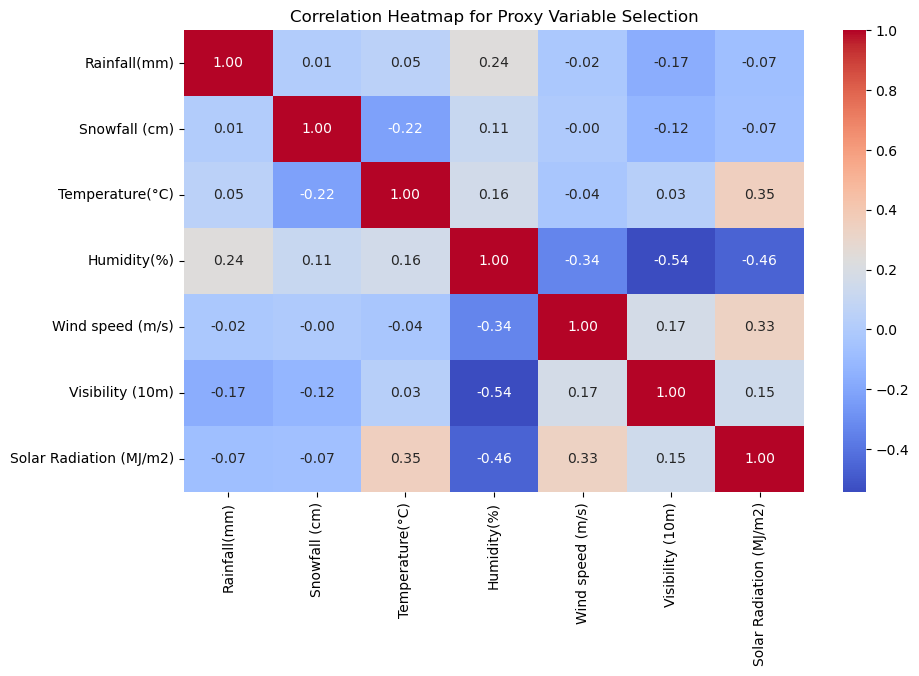

Feature Importance for Proxy Variable Selection:
                  Features  Rainfall Importance  Snowfall Importance
1              Humidity(%)             0.302102             0.335339
3         Visibility (10m)             0.231963             0.157749
0          Temperature(°C)             0.207418             0.284662
2         Wind speed (m/s)             0.154984             0.118102
4  Solar Radiation (MJ/m2)             0.103533             0.104147
Mutual Information Scores:
                  Features  Rainfall MI  Snowfall MI
1              Humidity(%)     0.111499     0.041382
3         Visibility (10m)     0.031812     0.034123
0          Temperature(°C)     0.031091     0.103570
4  Solar Radiation (MJ/m2)     0.024945     0.001662
2         Wind speed (m/s)     0.001315     0.019735


In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv("SeoulBikeDataset.csv")

# Filter relevant columns
columns = ['Rainfall(mm)', 'Snowfall (cm)', 'Temperature(°C)', 'Humidity(%)', 
           'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)']
df_subset = df[columns].dropna()  # Drop NaN values

# Correlation Analysis
correlation_matrix = df_subset.corr()

# Plot Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Proxy Variable Selection")
plt.show()

# Feature Importance Analysis with RandomForest
X = df_subset.drop(columns=['Rainfall(mm)', 'Snowfall (cm)'])
y_rainfall = df_subset['Rainfall(mm)']
y_snowfall = df_subset['Snowfall (cm)']

# RandomForest for Rainfall
rf_rainfall = RandomForestRegressor(random_state=42)
rf_rainfall.fit(X, y_rainfall)
rainfall_importance = rf_rainfall.feature_importances_

# RandomForest for Snowfall
rf_snowfall = RandomForestRegressor(random_state=42)
rf_snowfall.fit(X, y_snowfall)
snowfall_importance = rf_snowfall.feature_importances_

# Compile Feature Importance Results
importance_df = pd.DataFrame({
    'Features': X.columns,
    'Rainfall Importance': rainfall_importance,
    'Snowfall Importance': snowfall_importance
}).sort_values(by='Rainfall Importance', ascending=False)

print("Feature Importance for Proxy Variable Selection:")
print(importance_df)

# Mutual Information for Rainfall and Snowfall
mi_rainfall = mutual_info_regression(X, y_rainfall)
mi_snowfall = mutual_info_regression(X, y_snowfall)

# Compile MI Results
mi_df = pd.DataFrame({
    'Features': X.columns,
    'Rainfall MI': mi_rainfall,
    'Snowfall MI': mi_snowfall
}).sort_values(by='Rainfall MI', ascending=False)

print("Mutual Information Scores:")
print(mi_df)

### Appendix D: All Visualizations

In [7]:
fig1.show()
fig2.show()
fig3.show()
fig4.show()